In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor as XGBR
import lightgbm as lgb

In [4]:
path1=r'D:\读研\kaggle\二手车数据预测\used_car_sample_submit.csv'
path2=r'D:\读研\kaggle\二手车数据预测\used_car_testA_20200313.csv'
path3=r'D:\读研\kaggle\二手车数据预测\used_car_train_20200313.csv'

In [5]:
sample_submit=pd.read_csv(path1)
test_data=pd.read_csv(path2,sep=' ')
train_data=pd.read_csv(path3,sep=' ')

In [6]:
sample_submit.head()

,SaleID,price
0,150000,0
1,150001,0
2,150002,0
3,150003,0
4,150004,0


In [7]:
train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [8]:
train_data.isnull().mean()

SaleID               0.000000
name                 0.000000
regDate              0.000000
model                0.000007
brand                0.000000
bodyType             0.030040
fuelType             0.057867
gearbox              0.039873
power                0.000000
kilometer            0.000000
notRepairedDamage    0.000000
regionCode           0.000000
seller               0.000000
offerType            0.000000
creatDate            0.000000
price                0.000000
v_0                  0.000000
v_1                  0.000000
v_2                  0.000000
v_3                  0.000000
v_4                  0.000000
v_5                  0.000000
v_6                  0.000000
v_7                  0.000000
v_8                  0.000000
v_9                  0.000000
v_10                 0.000000
v_11                 0.000000
v_12                 0.000000
v_13                 0.000000
v_14                 0.000000
dtype: float64

In [9]:
train_data['model'].fillna(train_data['model'].mode,inplace=True)

In [10]:
train_data.isnull().mean()

SaleID               0.000000
name                 0.000000
regDate              0.000000
model                0.000000
brand                0.000000
bodyType             0.030040
fuelType             0.057867
gearbox              0.039873
power                0.000000
kilometer            0.000000
notRepairedDamage    0.000000
regionCode           0.000000
seller               0.000000
offerType            0.000000
creatDate            0.000000
price                0.000000
v_0                  0.000000
v_1                  0.000000
v_2                  0.000000
v_3                  0.000000
v_4                  0.000000
v_5                  0.000000
v_6                  0.000000
v_7                  0.000000
v_8                  0.000000
v_9                  0.000000
v_10                 0.000000
v_11                 0.000000
v_12                 0.000000
v_13                 0.000000
v_14                 0.000000
dtype: float64

In [24]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [12]:
train_data.drop(['SaleID','name'],axis=1,inplace=True)

In [13]:
train_data['regDate'].max()

20151212

In [14]:
train_data['regDate']=train_data['regDate'].astype(str)

In [15]:
train_data['year']=train_data['regDate'].apply(lambda x: x[0:4])

In [16]:
train_data.head()

,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,...,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,year
0,20040402,30,6,1.0,0.0,0.0,60,12.5,0.0,1046,...,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,2004
1,20030301,40,1,2.0,0.0,0.0,0,15.0,-,4366,...,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,2003
2,20040403,115,15,1.0,0.0,0.0,163,12.5,0.0,2806,...,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,2004
3,19960908,109,10,0.0,0.0,1.0,193,15.0,0.0,434,...,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,1996
4,20120103,110,5,1.0,0.0,0.0,68,5.0,0.0,6977,...,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,2012


In [17]:
train_data['month']=train_data['regDate'].apply(lambda x: x[4:6])
train_data['day']=train_data['regDate'].apply(lambda x: x[6:])

In [18]:
train_data.drop(['regDate'],axis=1,inplace=True)

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
model                150000 non-null object
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4                  150000 non-null float64
v_5                  150000 non-null float64
v_6                  150000 non-null float64
v_7  

In [46]:
train_data['year']=train_data['year'].astype(int)

In [47]:
train_data['month']=train_data['month'].astype(int)
train_data['day']=train_data['day'].astype(int)

In [52]:
X=train_data.drop(['price','model','notRepairedDamage'],axis=1)
Y=train_data['price']

# 特征工程

In [26]:
sns.set_style()

In [28]:
train_num=train_data.select_dtypes(exclude='object')

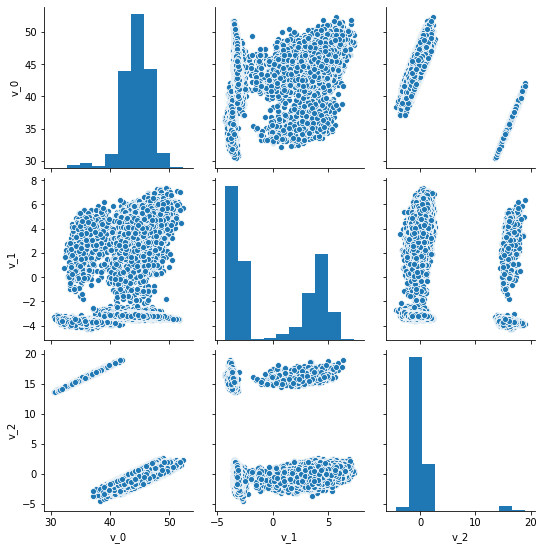

In [39]:
sns.pairplot(train_data[['v_0','v_1','v_2']])

In [ ]:
# 这里我包装了一个异常值处理的代码，可以随便调用。
def outliers_proc(data, col_name, scale=3):
    """
    用于清洗异常值，默认用 box_plot（scale=3）进行清洗
    :param data: 接收 pandas 数据格式
    :param col_name: pandas 列名
    :param scale: 尺度
    :return:
    """

    def box_plot_outliers(data_ser, box_scale):
        """
        利用箱线图去除异常值
        :param data_ser: 接收 pandas.Series 数据格式
        :param box_scale: 箱线图尺度，
        :return:
        """
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        val_low = data_ser.quantile(0.25) - iqr
        val_up = data_ser.quantile(0.75) + iqr
        rule_low = (data_ser < val_low)
        rule_up = (data_ser > val_up)
        return (rule_low, rule_up), (val_low, val_up)

In [53]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [54]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [57]:
train_score=[]
test_score=[]
for i in range(100,150,10):
    reg=XGBR(n_estimators=i,slient=False).fit(X_train,Y_train)
    trains=cross_val_score(reg,X_train,Y_train,cv=5,scoring='neg_mean_absolute_error').mean()
    tests=mean_absolute_error(reg.predict(X_test),Y_test)
    train_score.append(trains)
    test_score.append(tests)

c:\users\鱼鱼鱼\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:35:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:35:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\鱼鱼鱼\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:36:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\鱼鱼鱼\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:36:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\鱼鱼鱼\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:36:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\鱼鱼鱼\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:37:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\鱼鱼鱼\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:37:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:38:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\鱼鱼鱼\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:38:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\鱼鱼鱼\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:39:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\鱼鱼鱼\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:39:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\鱼鱼鱼\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:39:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\鱼鱼鱼\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:40:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:40:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\鱼鱼鱼\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:41:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\鱼鱼鱼\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:41:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\鱼鱼鱼\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:42:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\鱼鱼鱼\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:42:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\鱼鱼鱼\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:43:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:43:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\鱼鱼鱼\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:44:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\鱼鱼鱼\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:45:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\鱼鱼鱼\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:45:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\鱼鱼鱼\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:45:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\鱼鱼鱼\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:46:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:46:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\鱼鱼鱼\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:47:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\鱼鱼鱼\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:47:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\鱼鱼鱼\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:48:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\鱼鱼鱼\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:49:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [59]:
print(train_score)
print(test_score)

[-868.8540470443147, -862.2607329689865, -853.8347803345272, -845.8334338774828, -838.2311147875989]
[896.1608025613149, 886.3262357716349, 879.3839917597533, 872.550616963768, 864.8352781067742]


In [79]:
reg.predict(X_test)#3.26 MAS为896

array([ 8813.934 ,  1439.5302, 10988.567 , ...,   949.5779,  1650.7935,
       12045.754 ], dtype=float32)

In [60]:
test_data.drop(['SaleID','name'],axis=1,inplace=True)

In [61]:
test_data['regDate']=test_data['regDate'].astype(str)

In [62]:
test_data['year']=test_data['regDate'].apply(lambda x: x[0:4])
test_data['month']=test_data['regDate'].apply(lambda x: x[4:6])
test_data['day']=test_data['regDate'].apply(lambda x: x[6:])

In [63]:
test_data['year']=test_data['year'].astype(int)
test_data['month']=test_data['month'].astype(int)
test_data['day']=test_data['day'].astype(int)

In [64]:
X_final_test=test_data.drop(['regDate','model','notRepairedDamage'],axis=1)

In [65]:
sample_submit['price']=reg.predict(X_final_test)

In [66]:
sample_submit.to_csv(r'D:\读研\kaggle\二手车数据预测\submit.csv',index=False)